<a href="https://colab.research.google.com/github/lalithanjali04/AI-Powered-Enhanced-EHR-Imaging-Documentation-System/blob/main/Module1_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI-Powered-Enhanced EHR Imaging & Documentation System (Module 1 )

In [34]:
!ls /content

 cleaned_data					     ICDCodeSet.csv
 Doctor_Prescriptions				     sample_data
'Doctor’s Handwritten Prescription BD dataset.zip'   xray_data
 healthcare_dataset.csv				     XraysData.zip


In [6]:
# --- Unzip Doctor’s Handwritten Prescription BD dataset ---
!unzip "/content/Doctor’s Handwritten Prescription BD dataset.zip" -d "/content/Doctor_Prescriptions/"

# --- Unzip Xrays dataset ---
!unzip "/content/XraysData.zip" -d "/content/xray_data/"


Streaming output truncated to the last 5000 lines.
  inflating: /content/Doctor_Prescriptions/Doctor’s Handwritten Prescription BD dataset/Testing/testing_words/731.png  
  inflating: /content/Doctor_Prescriptions/Doctor’s Handwritten Prescription BD dataset/Testing/testing_words/732.png  
  inflating: /content/Doctor_Prescriptions/Doctor’s Handwritten Prescription BD dataset/Testing/testing_words/733.png  
  inflating: /content/Doctor_Prescriptions/Doctor’s Handwritten Prescription BD dataset/Testing/testing_words/734.png  
  inflating: /content/Doctor_Prescriptions/Doctor’s Handwritten Prescription BD dataset/Testing/testing_words/735.png  
  inflating: /content/Doctor_Prescriptions/Doctor’s Handwritten Prescription BD dataset/Testing/testing_words/736.png  
  inflating: /content/Doctor_Prescriptions/Doctor’s Handwritten Prescription BD dataset/Testing/testing_words/737.png  
  inflating: /content/Doctor_Prescriptions/Doctor’s Handwritten Prescription BD dataset/Testing/testing_words

In [8]:
!ls /content/Doctor_Prescriptions
!ls /content/xray_data


'Doctor’s Handwritten Prescription BD dataset'
XraysData


# 🩺 AI-Powered Enhanced EHR Imaging & Documentation System
### Module 1 – Data Collection & Preprocessing  

This module focuses on collecting, cleaning, and preparing both **structured (tabular)** and **unstructured (image/text)** healthcare data for further AI-based processing.  
The datasets used are:  

- **Healthcare Dataset** – patient and hospital details  
- **ICD CodeSet** – medical code–disease mapping  
- **Doctor’s Handwritten Prescription BD Dataset** – image-based prescription data  
- **X-ray Data** – medical imaging dataset  

The goal is to perform:
- Data cleaning, encoding, and scaling for structured data  
- Indexing and linking of unstructured datasets  
- Saving the preprocessed outputs for later modules (Image Enhancement & Diagnosis Prediction)


## ⚙️ Step 1 – Environment Setup  
This step imports all the required Python libraries such as `pandas`, `numpy`, `matplotlib`, `seaborn`, and scikit-learn preprocessing modules.  
These libraries help in data handling, visualization, encoding, and scaling.  


In [9]:
# =====================================================================
#  MODULE 1: DATA COLLECTION & PREPROCESSING (FINAL VERSION)
# Project: AI-Powered Enhanced EHR Imaging & Documentation System
# =====================================================================

# --- 1️. SETUP ---
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 4)

# Mount Google Drive if needed
# from google.colab import drive
# drive.mount('/content/drive')


## 📂 Step 2 – Dataset Loading  
Here we load the following CSV datasets:  
- `healthcare_dataset.csv`  
- `ICDCodeSet.csv`  

After loading, we inspect their shape and preview the first few records to ensure successful import.  
If a `patient_id` column is missing, we create one for unique identification.  


In [37]:
# =====================================================================
# 2️. LOAD DATASETS
# =====================================================================

healthcare_path = "/content/healthcare_dataset.csv"
icd_path        = "/content/ICDCodeSet.csv"

print("=== Loading Healthcare Dataset ===")
df_health = pd.read_csv(healthcare_path)
print("Healthcare shape:", df_health.shape)
display(df_health.head())

print("\n=== Loading ICD Code Dataset ===")
df_icd = pd.read_csv(icd_path)
print("ICD shape:", df_icd.shape)
display(df_icd.head())

# Add patient_id if missing
if 'patient_id' not in df_health.columns:
    df_health.insert(0, 'patient_id', range(1001, 1001 + len(df_health)))
    print("🆔 patient_id added.")


=== Loading Healthcare Dataset ===
Healthcare shape: (55500, 15)


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal



=== Loading ICD Code Dataset ===
ICD shape: (73639, 2)


,ICDCode,Description
0,A000,"Cholera due to Vibrio cholerae 01, biovar c..."
1,A001,"Cholera due to Vibrio cholerae 01, biovar e..."
2,A009,"Cholera, unspecified"
3,A0100,"Typhoid fever, unspecified"
4,A0101,Typhoid meningitis


🆔 patient_id added.


## 🧹 Step 3 – Healthcare Dataset Cleaning & Preprocessing  
In this step we:
1. Check for missing values  
2. Convert date columns into a new numerical feature **Stay_Duration**  
3. Drop irrelevant fields such as Name, Doctor, Hospital, etc.  
4. Handle missing data using median/mode imputation  
5. Encode categorical columns (Gender, Blood Type, Medical Condition, etc.)  
6. Scale numerical features using `StandardScaler`  

The resulting dataset becomes completely numeric and ready for machine-learning processing.  


In [11]:
# =====================================================================
# 3️. CLEAN & PREPROCESS HEALTHCARE DATASET
# =====================================================================

print("\n=== Missing Value Check ===")
print(df_health.isnull().sum())

# Convert dates → Stay_Duration
if 'Date of Admission' in df_health.columns and 'Discharge Date' in df_health.columns:
    df_health['Date of Admission'] = pd.to_datetime(df_health['Date of Admission'], errors='coerce')
    df_health['Discharge Date']    = pd.to_datetime(df_health['Discharge Date'], errors='coerce')
    df_health['Stay_Duration'] = (df_health['Discharge Date'] - df_health['Date of Admission']).dt.days
    print("📅 Stay_Duration created.")

# Drop non-informative columns
cols_to_drop = [
    'Name', 'Doctor', 'Hospital',
    'Insurance Provider', 'Billing Amount',
    'Room Number', 'Date of Admission', 'Discharge Date'
]
df_health.drop(columns=cols_to_drop, inplace=True, errors='ignore')
print("🧹 Dropped non-informative columns.")

# Handle missing values
df_health = df_health.fillna(df_health.median(numeric_only=True))
df_health = df_health.fillna(df_health.mode().iloc[0])
print("✅ Missing values handled.")

# Encode only selected categorical columns
cols_to_encode = [
    'Gender', 'Blood Type',
    'Medical Condition', 'Admission Type',
    'Medication', 'Test Results'
]

label_mappings = {}
for col in cols_to_encode:
    if col in df_health.columns:
        le = LabelEncoder()
        df_health[col] = le.fit_transform(df_health[col].astype(str))
        label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

print("\n🔢 Label Encodings Applied:")
for col, mapping in label_mappings.items():
    print(f"{col}: {mapping}")

# Scale numeric columns
scaler = StandardScaler()
num_cols = df_health.select_dtypes(include=['int64','float64']).columns.drop('patient_id', errors='ignore')
df_health[num_cols] = scaler.fit_transform(df_health[num_cols])
print("📊 Numeric columns scaled.")

print("\n✅ Cleaned Healthcare Dataset Preview:")
display(df_health.head())


=== Missing Value Check ===
patient_id            0
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64
📅 Stay_Duration created.
🧹 Dropped non-informative columns.
✅ Missing values handled.

🔢 Label Encodings Applied:
Gender: {'Female': np.int64(0), 'Male': np.int64(1)}
Blood Type: {'A+': np.int64(0), 'A-': np.int64(1), 'AB+': np.int64(2), 'AB-': np.int64(3), 'B+': np.int64(4), 'B-': np.int64(5), 'O+': np.int64(6), 'O-': np.int64(7)}
Medical Condition: {'Arthritis': np.int64(0), 'Asthma': np.int64(1), 'Cancer': np.int64(2), 'Diabetes': np.int64(3), 'Hypertension': np.int64(4), 'Obesity': np.int64(5)}
Admission Type: {'Elective': np.int64(0), 'Emergency': np.int64(1), 'U

,patient_id,Age,Gender,Blood Type,Medical Condition,Admission Type,Medication,Test Results,Stay_Duration
0,1001,-1.098824,0.999136,0.658348,-0.292010,1.222679,0.708975,1.224795,-1.560018
1,1002,0.533639,0.999136,-1.525364,1.464101,0.001738,-0.706222,0.002423,-1.098099
2,1003,1.247842,-1.000865,-1.088622,1.464101,0.001738,-1.413820,1.224795,-0.058780
3,1004,-1.200853,-1.000865,1.095090,0.293360,-1.219203,-0.706222,-1.219949,1.673417
4,1005,-0.435636,-1.000865,-0.651879,-0.292010,1.222679,1.416574,-1.219949,0.518619


## 🧾 Step 4 – ICD-10 Code Dataset Preparation  
This step removes duplicates, standardizes column names, and creates a mapping between **ICD Code → Description**.  
These codes will later be linked with patient diagnoses in Module 3.  


In [12]:
# =====================================================================
# 4️. CLEAN ICD CODE DATASET
# =====================================================================

df_icd = df_icd.drop_duplicates()
df_icd.columns = [c.strip().replace(" ", "_") for c in df_icd.columns]
icd_mapping = dict(zip(df_icd.iloc[:,0], df_icd.iloc[:,1]))

## 💊 Step 5 – Doctor’s Handwritten Prescription Dataset Processing  
Each split (train, test, validation) contains an image folder and a label CSV.  
This block:
- Loads the label CSVs  
- Adds split identifiers  
- Builds proper image paths  
- Creates unique `prescription_id`s  

The three splits are then concatenated into one DataFrame.  


In [17]:
# =====================================================================
# 5️. PREPROCESS PRESCRIPTION DATASET
# =====================================================================

pres_train_path = "/content/Doctor_Prescriptions/Doctor’s Handwritten Prescription BD dataset/Training/training_labels.csv"
pres_test_path  = "/content/Doctor_Prescriptions/Doctor’s Handwritten Prescription BD dataset/Testing/testing_labels.csv"
pres_val_path   = "/content/Doctor_Prescriptions/Doctor’s Handwritten Prescription BD dataset/Validation/validation_labels.csv"

def preprocess_prescription_csv(path, split_name):
    if not os.path.exists(path):
        print(f"⚠️ {path} file not found, skipping.")
        return pd.DataFrame()
    df = pd.read_csv(path)
    df.columns = [c.strip().replace(" ", "_") for c in df.columns]
    df['split'] = split_name
    # Correct the image path assuming image files are in a subdirectory named after the split
    df['image_path'] = df['IMAGE'].apply(lambda x: f"/content/Doctor_Prescriptions/Doctor’s Handwritten Prescription BD dataset/{split_name}/{split_name}_words/{x}")
    df['prescription_id'] = [f"P{1000+i}" for i in range(len(df))]
    return df

df_pres_train = preprocess_prescription_csv(pres_train_path, "Training")
df_pres_test  = preprocess_prescription_csv(pres_test_path, "Testing")
df_pres_val   = preprocess_prescription_csv(pres_val_path, "Validation")


df_pres = pd.concat([df_pres_train, df_pres_test, df_pres_val], ignore_index=True)
print("Prescription data shape:", df_pres.shape)
display(df_pres.head())

Prescription data shape: (4680, 6)


,IMAGE,MEDICINE_NAME,GENERIC_NAME,split,image_path,prescription_id
0,0.png,Aceta,Paracetamol,Training,/content/Doctor_Prescriptions/Doctor’s Handwri...,P1000
1,1.png,Aceta,Paracetamol,Training,/content/Doctor_Prescriptions/Doctor’s Handwri...,P1001
2,2.png,Aceta,Paracetamol,Training,/content/Doctor_Prescriptions/Doctor’s Handwri...,P1002
3,3.png,Aceta,Paracetamol,Training,/content/Doctor_Prescriptions/Doctor’s Handwri...,P1003
4,4.png,Aceta,Paracetamol,Training,/content/Doctor_Prescriptions/Doctor’s Handwri...,P1004


In [16]:
import pandas as pd

pres_train_path = "/content/Doctor_Prescriptions/Doctor’s Handwritten Prescription BD dataset/Training/training_labels.csv"

try:
    df_train_sample = pd.read_csv(pres_train_path)
    print("Columns in training_labels.csv:")
    print(df_train_sample.columns)
except FileNotFoundError:
    print(f"⚠️ {pres_train_path} not found.")

Columns in training_labels.csv:
Index(['IMAGE', 'MEDICINE_NAME', 'GENERIC_NAME'], dtype='object')


## 🩻 Step 6 – X-ray Image Dataset Indexing  
Here we scan the X-ray image folders (`train`, `test`, `val`) and record:
- File paths  
- Class labels (adenocarcinoma, large_cell, squamous_cell, normal)  
- Split type  

A single DataFrame is created to serve as an image index for further enhancement tasks.  


In [19]:
# =====================================================================
# 6️. PREPROCESS X-RAY DATASET
# =====================================================================

xray_root = "/content/xray_data/XraysData"  # update path

xray_records = []
for split in ["train", "test", "val"]:
    split_path = os.path.join(xray_root, split)
    if not os.path.exists(split_path): continue
    for cls in os.listdir(split_path):
        class_dir = os.path.join(split_path, cls)
        if os.path.isdir(class_dir):
            for img in os.listdir(class_dir):
                if img.lower().endswith(('.jpg','.png')):
                    xray_records.append({
                        'xray_id': f"X{len(xray_records)+1:04d}",
                        'split': split,
                        'label': cls,
                        'image_path': os.path.join(class_dir, img)
                    })

df_xray = pd.DataFrame(xray_records)
print("X-ray data shape:", df_xray.shape)
display(df_xray.head())


X-ray data shape: (928, 4)


,xray_id,split,label,image_path
0,X0001,train,large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa,/content/xray_data/XraysData/train/large.cell....
1,X0002,train,large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa,/content/xray_data/XraysData/train/large.cell....
2,X0003,train,large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa,/content/xray_data/XraysData/train/large.cell....
3,X0004,train,large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa,/content/xray_data/XraysData/train/large.cell....
4,X0005,train,large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa,/content/xray_data/XraysData/train/large.cell....


## 🔗 Step 7 – Creating Synthetic Links Between Datasets  
To simulate real EHR connectivity, we randomly assign:
- `prescription_id` from the prescription dataset  
- `xray_id` from the X-ray index  

This ensures each patient record can be connected to its medical images and prescriptions.  


In [20]:
# =====================================================================
# 7️. CREATE SYNTHETIC LINKS BETWEEN DATASETS
# =====================================================================

if not df_pres.empty:
    df_health['prescription_id'] = np.random.choice(df_pres['prescription_id'], size=len(df_health))
if not df_xray.empty:
    df_health['xray_id'] = np.random.choice(df_xray['xray_id'], size=len(df_health))


## 💾 Step 8 – Saving Cleaned Datasets  
All cleaned and indexed datasets are exported into the `/content/cleaned_data/` directory for reuse in subsequent modules:  
- `cleaned_healthcare_dataset.csv`  
- `cleaned_icdcodeset.csv`  
- `cleaned_prescription_dataset.csv`  
- `cleaned_xray_index.csv`  


In [21]:
# =====================================================================
# 8️. SAVE CLEANED DATASETS
# =====================================================================

os.makedirs("/content/cleaned_data", exist_ok=True)
df_health.to_csv("/content/cleaned_data/cleaned_healthcare_dataset.csv", index=False)
df_icd.to_csv("/content/cleaned_data/cleaned_icdcodeset.csv", index=False)
if not df_pres.empty:
    df_pres.to_csv("/content/cleaned_data/cleaned_prescription_dataset.csv", index=False)
if not df_xray.empty:
    df_xray.to_csv("/content/cleaned_data/cleaned_xray_index.csv", index=False)

print("💾 All cleaned datasets saved in /content/cleaned_data")

💾 All cleaned datasets saved in /content/cleaned_data


## 📊 Step 9 – Module 1 Summary  
This cell prints final dataset shapes and confirms the preprocessing pipeline executed successfully.  
The outputs of Module 1 will be used in Module 2 (Image Enhancement) and Module 3 (Disease Prediction & Documentation).  


In [22]:
# =====================================================================
# 9️. SUMMARY
# =====================================================================

print("\n=== MODULE 1 SUMMARY ===")
print(f"Healthcare records: {df_health.shape}")
print(f"ICD codes:          {df_icd.shape}")
print(f"Prescription data:  {df_pres.shape}")
print(f"X-ray data:         {df_xray.shape}")
print("\n🎯 Module 1 completed successfully — ready for Module 2 (Image Enhancement)!")


=== MODULE 1 SUMMARY ===
Healthcare records: (55500, 11)
ICD codes:          (73639, 2)
Prescription data:  (4680, 6)
X-ray data:         (928, 4)

🎯 Module 1 completed successfully — ready for Module 2 (Image Enhancement)!


## 🔍 Step 10 – EDA & Validation of Cleaned Datasets  
We now verify:
- Missing or duplicate entries  
- Correct encoding and scaling  
- Data distributions and correlations  
- Dataset linkage consistency  

Visualizations (count plots, heatmaps) confirm that all preprocessing steps were successful.  




=== 🩺 HEALTHCARE DATASET VALIDATION ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patient_id         55500 non-null  int64  
 1   Age                55500 non-null  float64
 2   Gender             55500 non-null  float64
 3   Blood Type         55500 non-null  float64
 4   Medical Condition  55500 non-null  float64
 5   Admission Type     55500 non-null  float64
 6   Medication         55500 non-null  float64
 7   Test Results       55500 non-null  float64
 8   Stay_Duration      55500 non-null  float64
 9   prescription_id    55500 non-null  object 
 10  xray_id            55500 non-null  object 
dtypes: float64(8), int64(1), object(2)
memory usage: 4.7+ MB
None

✅ Missing Values per Column:
 patient_id           0
Age                  0
Gender               0
Blood Type           0
Medical Condition    0
Admission Typ

,patient_id,Age,Gender,Blood Type,Medical Condition,Admission Type,Medication,Test Results,Stay_Duration
count,55500.000000,5.550000e+04,5.550000e+04,5.550000e+04,5.550000e+04,5.550000e+04,5.550000e+04,5.550000e+04,5.550000e+04
mean,28750.500000,7.732753e-17,1.664334e-17,8.795367e-17,2.790961e-17,-2.419686e-17,-9.909191e-17,-4.768958e-17,-4.852175e-17
std,16021.614307,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,1001.000000,-1.966071e+00,-1.000865e+00,-1.525364e+00,-1.462751e+00,-1.219203e+00,-1.413820e+00,-1.219949e+00,-1.675498e+00
25%,14875.750000,-8.437519e-01,-1.000865e+00,-1.088622e+00,-8.773803e-01,-1.219203e+00,-7.062215e-01,-1.219949e+00,-8.671390e-01
50%,28750.500000,2.349424e-02,9.991355e-01,-2.151370e-01,2.933601e-01,1.737916e-03,1.376948e-03,2.422719e-03,-5.878027e-02
75%,42625.250000,8.397259e-01,9.991355e-01,6.583479e-01,8.787304e-01,1.222679e+00,7.089754e-01,1.224795e+00,8.650582e-01
max,56500.000000,1.911030e+00,9.991355e-01,1.531833e+00,1.464101e+00,1.222679e+00,1.416574e+00,1.224795e+00,1.673417e+00



🧩 Unique values in Gender: [ 0.99913551 -1.00086524]

🧩 Unique values in Blood Type: [ 0.65834792 -1.52536431 -1.08862186  1.09509037 -0.65187941 -0.21513697
  0.22160548  1.53183282]

🧩 Unique values in Medical Condition: [-0.2920101   1.46410062  0.29336014 -0.87738034  0.87873038 -1.46275058]

🧩 Unique values in Admission Type: [ 1.22267925  0.00173792 -1.21920342]

🧩 Unique values in Medication: [ 7.08975427e-01 -7.06221530e-01 -1.41382001e+00  1.41657391e+00
  1.37694839e-03]

🧩 Unique values in Test Results: [ 1.22479483  0.00242272 -1.21994939]


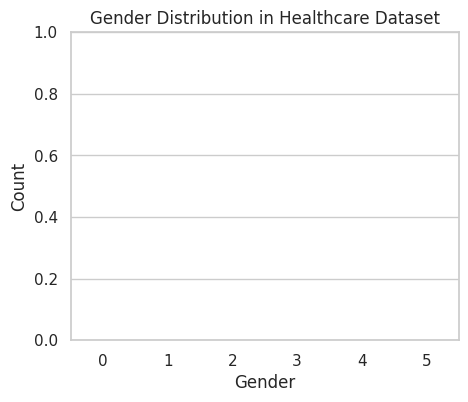

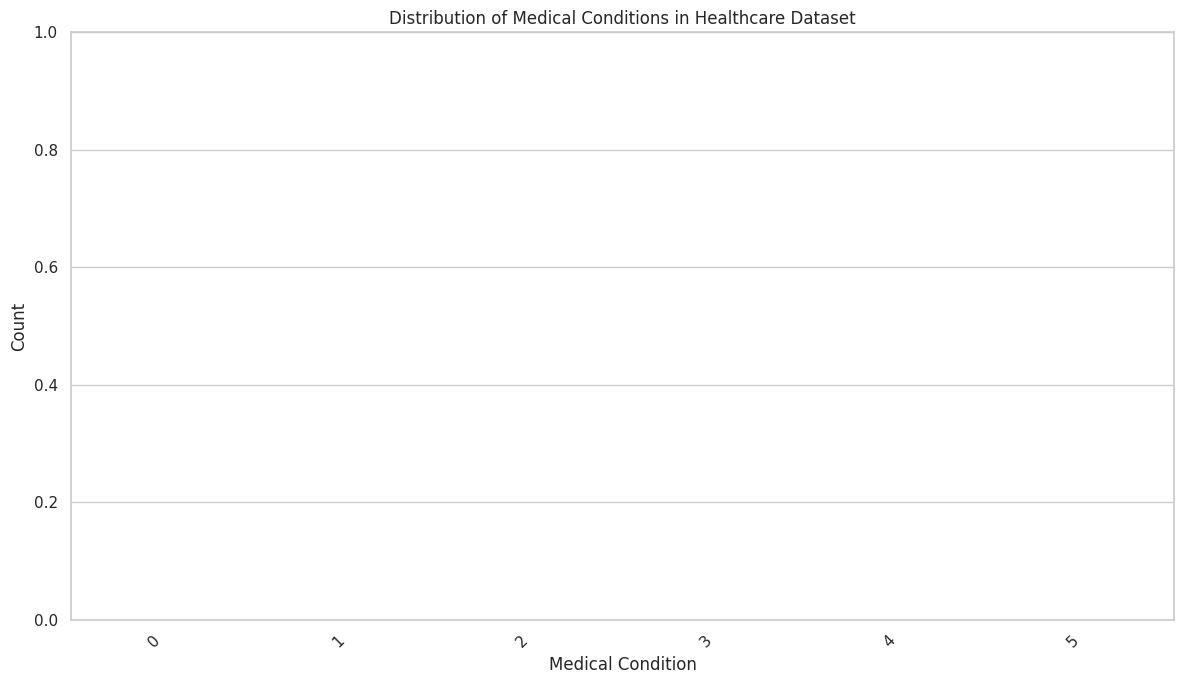

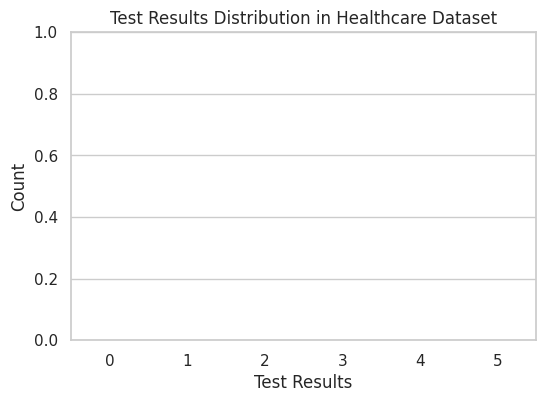

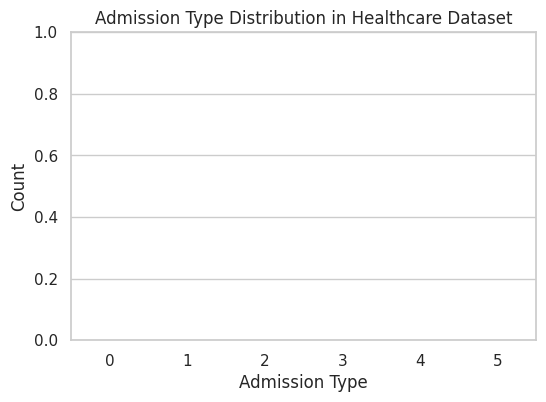

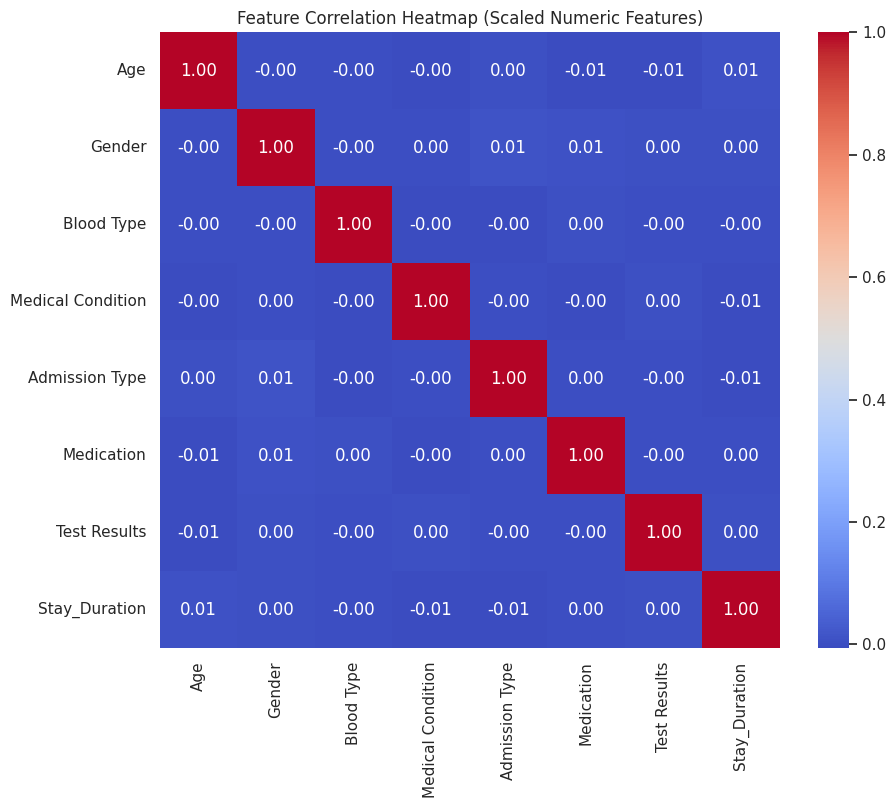

In [30]:
# =====================================================================
# 🔍 MODULE 1 VALIDATION & EDA (Exploratory Data Analysis)
# =====================================================================

import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------
# 1️⃣ HEALTHCARE DATASET EDA
# ---------------------------------------------------------------------
print("\n=== 🩺 HEALTHCARE DATASET VALIDATION ===")

# Basic info
print(df_health.info())
print("\n✅ Missing Values per Column:\n", df_health.isnull().sum())
print("\n✅ Duplicate Rows:", df_health.duplicated().sum())

# Summary statistics
print("\n📊 Numerical Summary:")
display(df_health.describe())

# Check unique counts for categorical columns
cat_cols = ['Gender','Blood Type','Medical Condition','Admission Type','Medication','Test Results']
for col in cat_cols:
    if col in df_health.columns:
        print(f"\n🧩 Unique values in {col}: {df_health[col].unique()}")


# Create a temporary DataFrame for visualization using original categorical values
df_health_viz = df_health.copy()

# Revert label encoding for visualization purposes
reverse_label_mappings = {col: {v: k for k, v in mapping.items()} for col, mapping in label_mappings.items()}

for col in cat_cols:
    if col in df_health_viz.columns and col in reverse_label_mappings:
        df_health_viz[col] = df_health_viz[col].map(reverse_label_mappings[col])


# Visualization 1: Gender Distribution
plt.figure(figsize=(5,4))
sns.countplot(x='Gender', data=df_health_viz, hue='Gender', legend=False) # Added hue and legend=False, removed palette
plt.title("Gender Distribution in Healthcare Dataset") # Added more specific title
plt.xlabel("Gender") # Ensure clear label
plt.ylabel("Count") # Ensure clear label
plt.show()

# Visualization 2: Medical Condition Distribution
plt.figure(figsize=(12, 7)) # Increased figure size slightly
sns.countplot(x='Medical Condition', data=df_health_viz, hue='Medical Condition', legend=False) # Added hue and legend=False, removed palette
plt.title("Distribution of Medical Conditions in Healthcare Dataset") # Added more specific title
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.xlabel("Medical Condition") # Ensure clear label
plt.ylabel("Count") # Ensure clear label
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# Visualization 3: Test Results
plt.figure(figsize=(6,4))
sns.countplot(x='Test Results', data=df_health_viz, hue='Test Results', legend=False) # Added hue and legend=False, removed palette
plt.title("Test Results Distribution in Healthcare Dataset") # Added more specific title
plt.xlabel("Test Results") # Ensure clear label
plt.ylabel("Count") # Ensure clear label
plt.show()

# Visualization 4: Admission Type Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Admission Type', data=df_health_viz, hue='Admission Type', legend=False) # Added hue and legend=False
plt.title("Admission Type Distribution in Healthcare Dataset") # Added more specific title
plt.xlabel("Admission Type") # Ensure clear label
plt.ylabel("Count") # Ensure clear label
plt.show()


# Visualization 5: Correlation Heatmap
plt.figure(figsize=(10,8)) # Increased figure size
sns.heatmap(df_health[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f") # Added fmt for annotation format
plt.title("Feature Correlation Heatmap (Scaled Numeric Features)") # Added more specific title
plt.show()

In [31]:
# ---------------------------------------------------------------------
# 2️⃣ ICD DATASET CHECK
# ---------------------------------------------------------------------
print("\n=== 🧾 ICD CODE DATASET VALIDATION ===")
print("Shape:", df_icd.shape)
print("✅ Duplicates:", df_icd.duplicated().sum())
print("✅ Missing values:", df_icd.isnull().sum().sum())
print("\nSample ICD Records:")
display(df_icd.head())

# Check for any empty descriptions
if df_icd.iloc[:,1].isnull().any():
    print("⚠️ Some ICD descriptions missing!")
else:
    print("✅ All ICD descriptions are present.")


=== 🧾 ICD CODE DATASET VALIDATION ===
Shape: (73639, 2)
✅ Duplicates: 0
✅ Missing values: 0

Sample ICD Records:


,ICDCode,Description
0,A000,"Cholera due to Vibrio cholerae 01, biovar c..."
1,A001,"Cholera due to Vibrio cholerae 01, biovar e..."
2,A009,"Cholera, unspecified"
3,A0100,"Typhoid fever, unspecified"
4,A0101,Typhoid meningitis


✅ All ICD descriptions are present.



=== 💊 PRESCRIPTION DATASET VALIDATION ===
Shape: (4680, 6)
✅ Missing Values: 0
✅ Duplicate Records: 0

Sample Prescription Records:


,IMAGE,MEDICINE_NAME,GENERIC_NAME,split,image_path,prescription_id
0,0.png,Aceta,Paracetamol,Training,/content/Doctor_Prescriptions/Doctor’s Handwri...,P1000
1,1.png,Aceta,Paracetamol,Training,/content/Doctor_Prescriptions/Doctor’s Handwri...,P1001
2,2.png,Aceta,Paracetamol,Training,/content/Doctor_Prescriptions/Doctor’s Handwri...,P1002
3,3.png,Aceta,Paracetamol,Training,/content/Doctor_Prescriptions/Doctor’s Handwri...,P1003
4,4.png,Aceta,Paracetamol,Training,/content/Doctor_Prescriptions/Doctor’s Handwri...,P1004


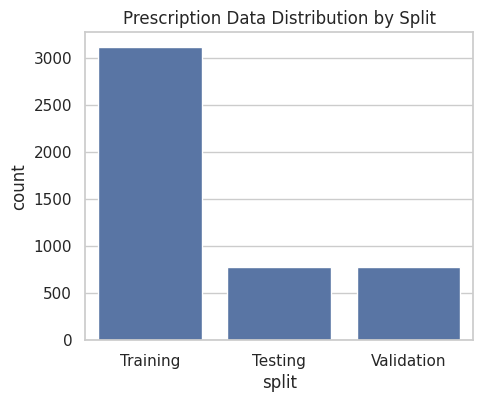

In [32]:
# ---------------------------------------------------------------------
# 3️⃣ PRESCRIPTION DATASET CHECK
# ---------------------------------------------------------------------
print("\n=== 💊 PRESCRIPTION DATASET VALIDATION ===")

if not df_pres.empty:
    print("Shape:", df_pres.shape)
    print("✅ Missing Values:", df_pres.isnull().sum().sum())
    print("✅ Duplicate Records:", df_pres.duplicated().sum())
    print("\nSample Prescription Records:")
    display(df_pres.head())

    # Count by split
    plt.figure(figsize=(5,4))
    sns.countplot(x='split', data=df_pres)
    plt.title("Prescription Data Distribution by Split")
    plt.show()

    # Check label frequencies
    if 'label' in df_pres.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(y='label', data=df_pres, order=df_pres['label'].value_counts().index)
        plt.title("Prescription Label Frequency")
        plt.show()

else:
    print("⚠️ Prescription dataset empty or not loaded.")



=== 🩻 X-RAY DATASET VALIDATION ===
Shape: (928, 4)
✅ Missing Values: 0
✅ Duplicate Records: 0

Sample X-ray Records:


,xray_id,split,label,image_path
0,X0001,train,large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa,/content/xray_data/XraysData/train/large.cell....
1,X0002,train,large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa,/content/xray_data/XraysData/train/large.cell....
2,X0003,train,large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa,/content/xray_data/XraysData/train/large.cell....
3,X0004,train,large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa,/content/xray_data/XraysData/train/large.cell....
4,X0005,train,large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa,/content/xray_data/XraysData/train/large.cell....


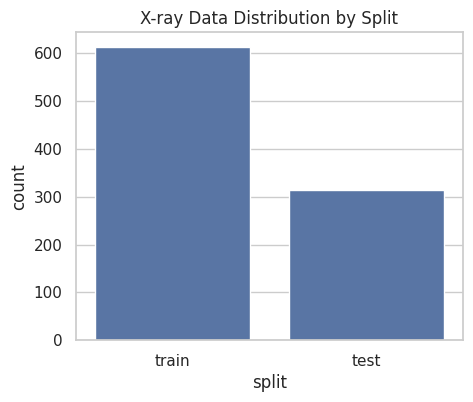

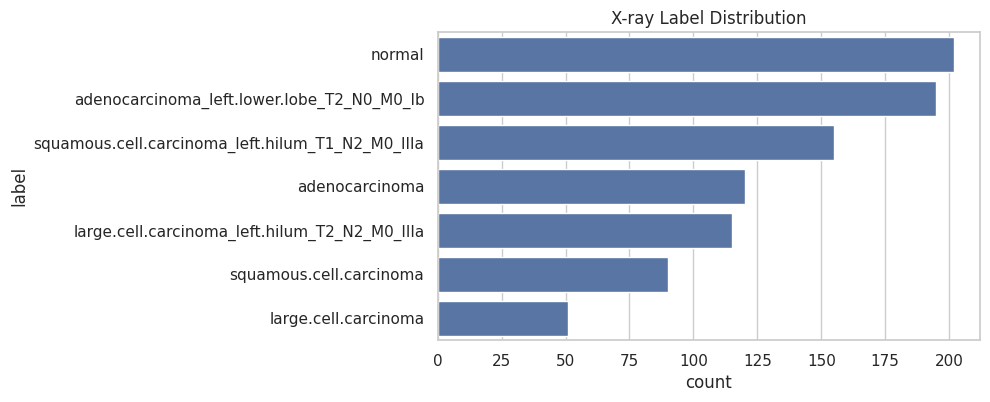


=== 🔗 CROSS-DATA LINK VALIDATION ===
Linked Prescription IDs found: 55500/55500
Linked X-ray IDs found: 55500/55500

✅ All datasets cleaned and relationships verified successfully!


In [33]:
# ---------------------------------------------------------------------
# 4️⃣ X-RAY DATASET CHECK
# ---------------------------------------------------------------------
print("\n=== 🩻 X-RAY DATASET VALIDATION ===")

if not df_xray.empty:
    print("Shape:", df_xray.shape)
    print("✅ Missing Values:", df_xray.isnull().sum().sum())
    print("✅ Duplicate Records:", df_xray.duplicated().sum())
    print("\nSample X-ray Records:")
    display(df_xray.head())

    # Count by split
    plt.figure(figsize=(5,4))
    sns.countplot(x='split', data=df_xray)
    plt.title("X-ray Data Distribution by Split")
    plt.show()

    # Count by label (disease class)
    plt.figure(figsize=(7,4))
    sns.countplot(y='label', data=df_xray, order=df_xray['label'].value_counts().index)
    plt.title("X-ray Label Distribution")
    plt.show()
else:
    print("⚠️ X-ray dataset empty or not loaded.")

# ---------------------------------------------------------------------
# 5️⃣ CROSS-DATA VALIDATION
# ---------------------------------------------------------------------
print("\n=== 🔗 CROSS-DATA LINK VALIDATION ===")

# Ensure that prescription_id and xray_id exist in linked datasets
if 'prescription_id' in df_health.columns:
    linked_pres = df_health['prescription_id'].isin(df_pres['prescription_id']).sum()
    print(f"Linked Prescription IDs found: {linked_pres}/{len(df_health)}")

if 'xray_id' in df_health.columns:
    linked_xrays = df_health['xray_id'].isin(df_xray['xray_id']).sum()
    print(f"Linked X-ray IDs found: {linked_xrays}/{len(df_health)}")

print("\n✅ All datasets cleaned and relationships verified successfully!")

# ✅ Module 1 Completed Successfully  

**Summary:**  
- Structured & unstructured data collected and cleaned  
- Unique identifiers added for cross-referencing  
- Data standardized, encoded, and scaled  
- Cleaned datasets saved for further use  

Next, we proceed to **Module 2 – Medical Image Enhancement** to improve X-ray clarity using pretrained AI models.  
